# Data Cleaning

To solve the business problem, the first step would be to eliminate fields that we are not interested to analyze. There are multiple reasons for this. Some of them are summarized below:
1. They do not provide any valuable information. Example: url
2. They contain only null values. Example: open_rv_12m, total_bal_il
3. They contain only 0. Example: acc_now_delinq
4. They contain only a single value. Example: application_type
5. They require non-trivial domain knowledge of credit systems

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan_df = pd.read_csv('./loan.csv',sep=',' ,dtype='unicode')

In [3]:
loan_df.drop(['desc','member_id', 'url', 'loan_amnt', 'funded_amnt_inv', 'policy_code', 'installment', 'grade', 'pymnt_plan', 'title', 'zip_code', 
         'earliest_cr_line', 'mths_since_last_record', 'recoveries', 'next_pymnt_d', 'application_type', 'tax_liens', 
         'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint','verification_status_joint','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m',
         'open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util',
         'total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util','mo_sin_old_il_acct',
         'mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq',
         'mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl',
         'num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq',
         'percent_bc_gt_75','tax_liens','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit',
         'collections_12_mths_ex_med', 'acc_now_delinq','chargeoff_within_12_mths','delinq_amnt'], axis=1, inplace=True)

loan_df.head(10)

,id,funded_amnt,term,int_rate,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,36 months,10.65%,B2,NaN,10+ years,RENT,24000,Verified,...,5863.155187,5833.84,5000,863.16,0,0,Jan-15,171.62,May-16,0
1,1077430,2500,60 months,15.27%,C4,Ryder,< 1 year,RENT,30000,Source Verified,...,1008.71,1008.71,456.46,435.17,0,1.11,Apr-13,119.66,Sep-13,0
2,1077175,2400,36 months,15.96%,C5,NaN,10+ years,RENT,12252,Not Verified,...,3005.666844,3005.67,2400,605.67,0,0,Jun-14,649.91,May-16,0
3,1076863,10000,36 months,13.49%,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,...,12231.89,12231.89,10000,2214.92,16.97,0,Jan-15,357.48,Apr-16,0
4,1075358,3000,60 months,12.69%,B5,University Medical Group,1 year,RENT,80000,Source Verified,...,3513.33,3513.33,2475.94,1037.39,0,0,May-16,67.79,May-16,0
5,1075269,5000,36 months,7.90%,A4,Veolia Transportaton,3 years,RENT,36000,Source Verified,...,5632.21,5632.21,5000,632.21,0,0,Jan-15,161.03,Jan-16,0
6,1069639,7000,60 months,15.96%,C5,Southern Star Photography,8 years,RENT,47004,Not Verified,...,10110.84,10110.84,6985.61,3125.23,0,0,May-16,1313.76,May-16,0
7,1072053,3000,36 months,18.64%,E1,MKC Accounting,9 years,RENT,48000,Source Verified,...,3939.135294,3939.14,3000,939.14,0,0,Jan-15,111.34,Dec-14,0
8,1071795,5600,60 months,21.28%,F2,NaN,4 years,OWN,40000,Source Verified,...,646.02,646.02,162.02,294.94,0,2.09,Apr-12,152.39,Aug-12,0
9,1071570,5375,60 months,12.69%,B5,Starbucks,< 1 year,RENT,15000,Verified,...,1476.19,1469.34,673.48,533.42,0,2.52,Nov-12,121.45,Mar-13,0


Furthermore, we will continue to clean the data as and when we require during data analysis.

# Univariate Analysis

In this section we will analyze individual attributes of the load data to solve the business problem. We will also analyze patterns and identify variables that can expose potential defaulters. For this analysis and the remaining, we will assume that those loans with "Charged Off" loan status indicate potential defaulters. The assumption may not be perfectly true but makes the analysis of defaulted loans significantly easy and is also good enough for this case study.

Although we are doing univariate analysis, we would want to compare the results of different categories of loan status. This is important so that we do not mistakenly assume driving factors through false positive or false negatives. In other words, say, if factor X increses the number of people in the 'Charge Off' category, and it also increases the count of people in other categories, then factor X is not a driving factor for defaulting.

Lets see if term of the loans have any impact on the loan status. The loan status indicates if a loan in fully paid or defaulted. We are going to ignore loans which have 'Current' loan status as they will not provide any insight about defaulters.

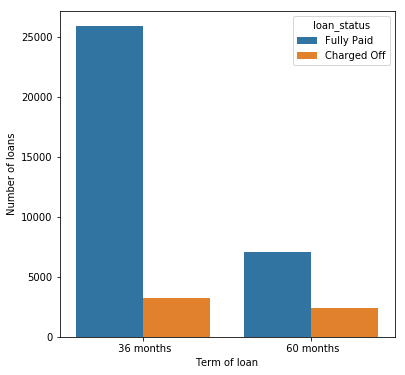

In [4]:
# removing loan entries with loan status Current
loan_df = loan_df[loan_df.loan_status != 'Current']

# Univariate analysis to observe the impact of loan term on count of defaulters
plt.figure(figsize=(6,6))
ax = sns.countplot(x='term', hue='loan_status', data=loan_df)
ax.set(xlabel = 'Term of loan', ylabel = 'Number of loans')
plt.show()

Its not difficult to observe that the count of defaulters is almost identical in both the terms despite far fewer people applying for loans with a term of 60 months. Probably a long time to pay back the amount gives people enough time to find a way to default.

Next, we will analyze what pattern grades follow to identify any hidden patterns for defaulters. In this analysis, instead of comparing the impact of a factor on the two different loan statuses side by side, we will use sampling and only observer the 'Charged Off' loans. Sampling is, essentially, the ratio of count of Charged Off loans to the total loans (Charged off + Fully Paid) of a category. Sampling the data ensures we avoid the false positives and false negatives while looking for driving factors of defaulting.

Lets create a method that will sample the loan based on a given category and record the proportion of 'Charged Off' loans in that category.

In [5]:
def createSampleDf(category):
    # create a pivot table to track the count of Charged Off and Fully Paid loans in each category
    pivt = loan_df.pivot_table(values='id', index=[category,'loan_status'], aggfunc='count')
    # convert to a dataframe
    sample_df = pivt.reset_index()
    # create a new column containing the proportions
    sample_df['proportion'] = sample_df.groupby(category)['id'].transform(lambda x: round(x/x.sum(),4))
    # keep only the rows corresponding to Charged Off loans
    sample_df = sample_df[sample_df.loan_status == 'Charged Off']
    return sample_df


Now, we will analyze if interest rate has any impact on defaulting. The interest rates are given as strings with a % sign. We will convert them to float and round them off to their nearest integers for easy analysis.

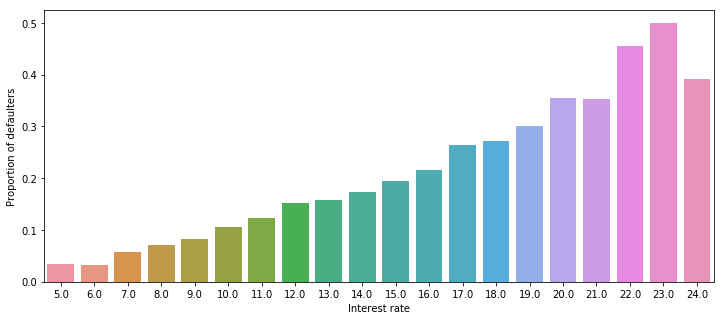

In [6]:
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: float(x.replace('%','')))
loan_df.int_rate = loan_df.int_rate.round(0)

# Analysis of int_rate for identifying defaulters
sample_df = createSampleDf('int_rate')
plt.figure(figsize=(12,5))
ax = sns.barplot(x='int_rate', y='proportion', data=sample_df)
ax.set(xlabel = 'Interest rate', ylabel = 'Proportion of defaulters')
plt.show()

As interest rate increases, unsuprisingly people tends to default more. However, there is a spike at interest rates between 22% and 23%. LC might want to investigate this. Additionally, lending club might consider avoiding charging high interest rates and instead devise a business model that both generates good revenue as well as keep interest rates low. For example, they may increase diversification of their funds so that they lent out less amount to more people and keep interest rates low.

We will now analyze if length of employment of individuals has any relation to defaulting. For this, we are going to preprocess the 'emp_length' field. All employment length less than 1 year will be converted to 0.5, 10+ years will be converted to 10.

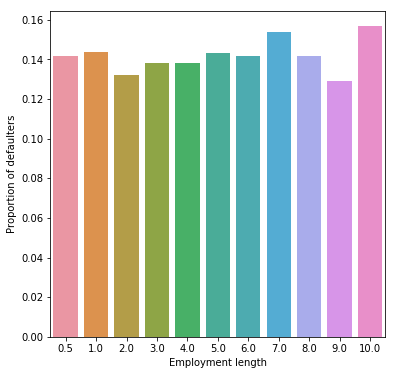

In [7]:
# Method to fix the employment length values
def fixEmpLn(empl):
    # < 1 year converted to 0.5
    if (empl == '< 1 year'):
        return 0.5
    # 1 year converted to 1
    elif (empl == '1 year'):
        return 1
    # 10+ years converted to 10
    elif (empl == '10+ years'):
        return 10
    # for others we remove the 'years' part
    return float(empl.replace(' years',''))

# Fix employment length field
loan_df = loan_df[~pd.isnull(loan_df['emp_length'])]    
loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x: fixEmpLn(x))
# Create the sampled dataframe containing proportion of Charged Off loans in each category of employment length
sample_df = createSampleDf('emp_length')
plt.figure(figsize=(6,6))
ax = sns.barplot(x='emp_length', y='proportion', data=sample_df)
ax.set(xlabel = 'Employment length', ylabel = 'Proportion of defaulters')
plt.show()

Freshers in companies are likely to default. There is an observable increase in tendency to default from between employment length 2 to 7 years. Between 7 to 9 the tendency to default falls. People with over 10+ years of experience are also quite likely to default. LC can use this information to adjust their scrutiny of borrowers. Freshers and people with 6,7 or 10+ years or experienced should be scrutinized the most.

Lets analyze if different category of home owners have any impact on defaulting.

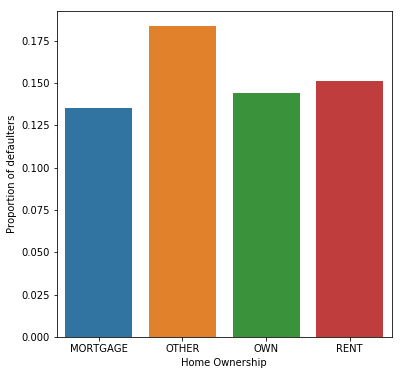

In [8]:
sample_df = createSampleDf('home_ownership')
plt.figure(figsize=(6,6))
ax = sns.barplot(x='home_ownership', y='proportion', data=sample_df)
ax.set(xlabel = 'Home Ownership', ylabel = 'Proportion of defaulters')
plt.show()

Looks like people who have reported their home ownership as OTHER has defaulted the most. LC needs to add more categories in howe_ownership field to find out exactly which kind of home ownership drives defaulting.

Next, lets analyze if there is any hidden pattern in the verification_status that might identify defaulters.

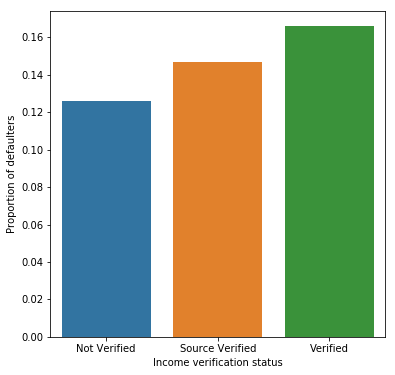

In [9]:
sample_df = createSampleDf('verification_status')
plt.figure(figsize=(6,6))
ax = sns.barplot(x='verification_status', y='proportion', data=sample_df)
ax.set(xlabel = 'Income verification status', ylabel = 'Proportion of defaulters')
plt.show()

It is like that there are loop holes in the income source verification process of LC. People whose income sources are verified have defaulted more than people with non verfied income sources. One possible reason could be, while taking loans defaulters are lying about their income sources which LC is recording as verified income source.

We want to know, next, if grades has any relation to defaulting. Since sub grades are a superset of grades, we will use sub grades for this analysis.

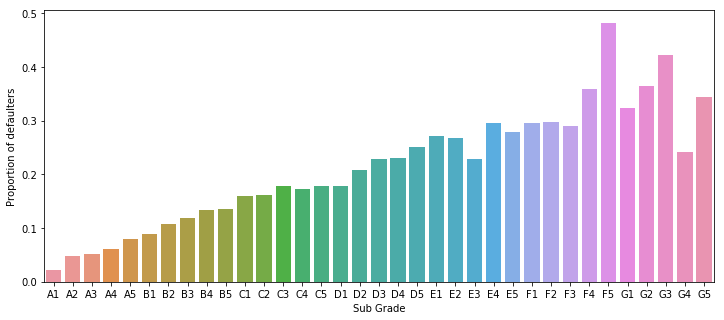

In [10]:
sample_df = createSampleDf('sub_grade')
plt.figure(figsize=(12,5))
ax = sns.barplot(x='sub_grade', y='proportion', data=sample_df)
ax.set(xlabel = 'Sub Grade', ylabel = 'Proportion of defaulters')
plt.show()

As one might expect, loans at high sub grades have most defaulters. There are some spikes at F5, G3, and G5 which might be good candidates to check for defaulting.

Lets analyze if purpose for taking loans have any indication for defaulting.

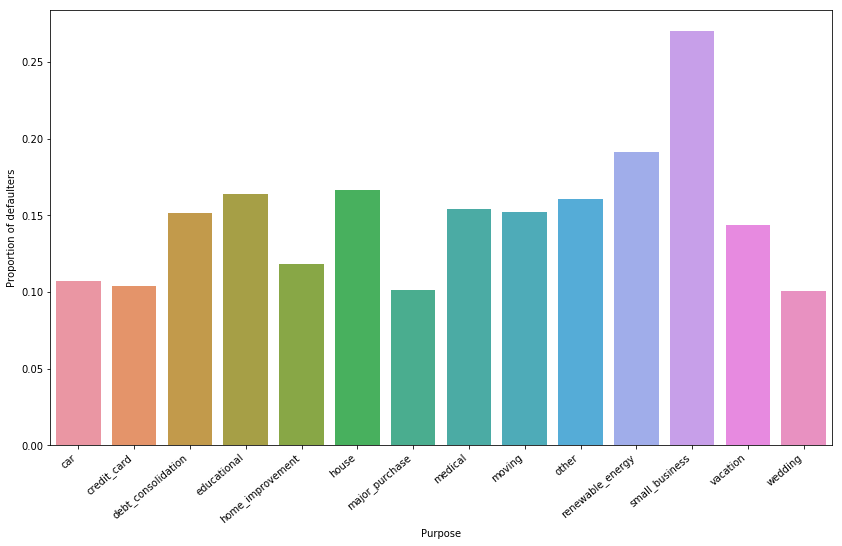

In [11]:
sample_df = createSampleDf('purpose')
plt.figure(figsize=(14,8))
ax = sns.barplot(x='purpose', y='proportion', data=sample_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel = 'Purpose', ylabel = 'Proportion of defaulters')
plt.show()

Defaulters have most often taken loans for the purpose of small business. LC need to increase scrutiny for these candidates.

# Bivariate Analysis

Lets find out if interest rates and states in US have any hidden indication towards defaulting.

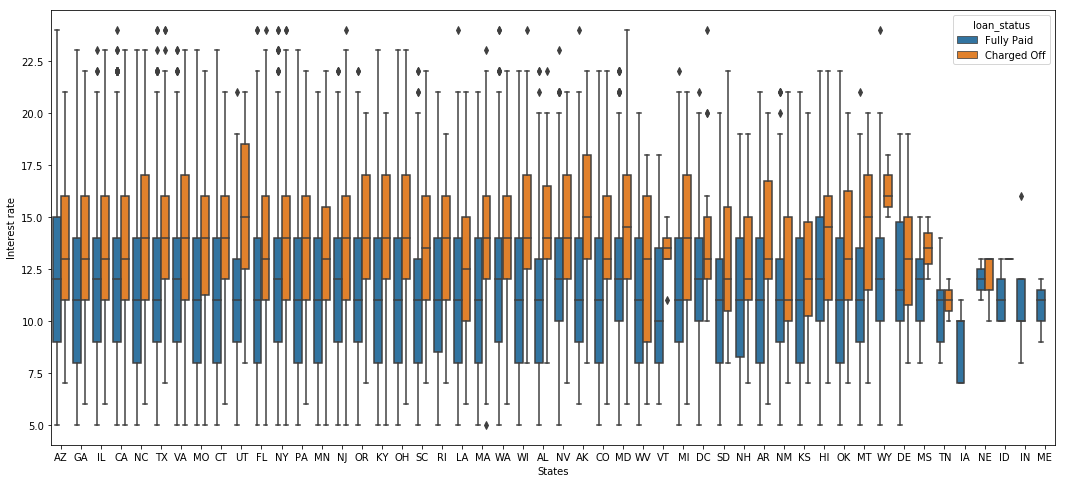

In [12]:
plt.figure(figsize=(18,8))
ax = sns.boxplot(x='addr_state', y='int_rate', hue='loan_status',data=loan_df);
ax.set(xlabel = 'States', ylabel = 'Interest rate')
plt.show()

The above plot is quite interesting. We can see that, for some states like UT, OH, NV, AK, WI, as the interest rates increase beyong a threshold most borrowers default. We can also see that some states like VT TN, IA, WY, IN, ME has significantly low number of defaulters.

# Derived Metrics

For this section, we will see if there is any relation between the month of loan issue for a borrower and his home ownership status. To examine the month of loan issue we will extract the month from the issue date and create a separate column called issue_month.

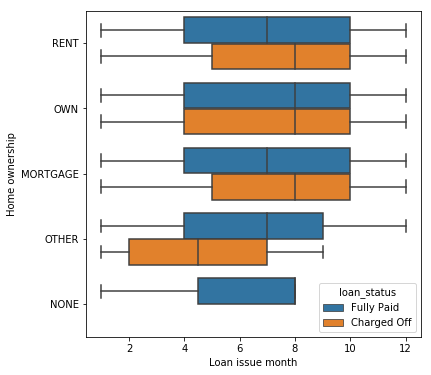

In [13]:
# Convert Dec-11 to Dec-2011
loan_df['issue_d'] = loan_df['issue_d'].apply(lambda x: x.replace('-','-20'))
# Create a month column
loan_df['issue_month'] = pd.to_datetime(loan_df['issue_d']).dt.month
plt.figure(figsize=(6,6))
ax = sns.boxplot(x='issue_month', y='home_ownership', hue='loan_status', data=loan_df);
ax.set(xlabel = 'Loan issue month', ylabel = 'Home ownership')
plt.show()

The plot throws light on the months from February to April. Only some people who has reported their home ownership as OTHER has taken loan during this time. All such people have defaulted. It could be possible that the inspection process of LC, during the month between Feb to Apr is not too rigorous and so some people with ill-motives are able to get loans even without providing proper residential status.